In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)

In [3]:
data_path = Path('../data/final_results.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
else:
    # Synthetic fallback dataset
    df = pd.DataFrame({
        'scenario': ['baseline','alt_impute','alt_outlier'],
        'return': [0.12, 0.11, 0.135],
        'volatility': [0.18, 0.185, 0.19],
        'sharpe': [0.56, 0.49, 0.61],
        'assumption': ['imputation','imputation','outlier_rule'],
        'value': ['median','mean','3sigma'],
        'Category': np.random.choice(['X','Y','Z'], 3),
        'MetricA': np.random.normal(75, 15, 3),
        'MetricB': np.random.normal(150, 30, 3),
        'Date': pd.date_range('2025-02-01', periods=3)
    })
df.head()

,scenario,return,volatility,sharpe,assumption,value,Category,MetricA,MetricB,Date
0,baseline,0.120,0.180,0.56,imputation,median,Y,75.037206,99.563014,2025-02-01
1,alt_impute,0.110,0.185,0.49,imputation,mean,Z,74.456082,175.913737,2025-02-02
2,alt_outlier,0.135,0.190,0.61,outlier_rule,3sigma,Y,84.236667,128.274684,2025-02-03


In [5]:
img_dir = Path('../deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f'Saved {name}')

Saved C:\Users\DELL\bootcamp_Dhriti_Trivedi\homework\stage12_results\deliverables\images\risk_return.png


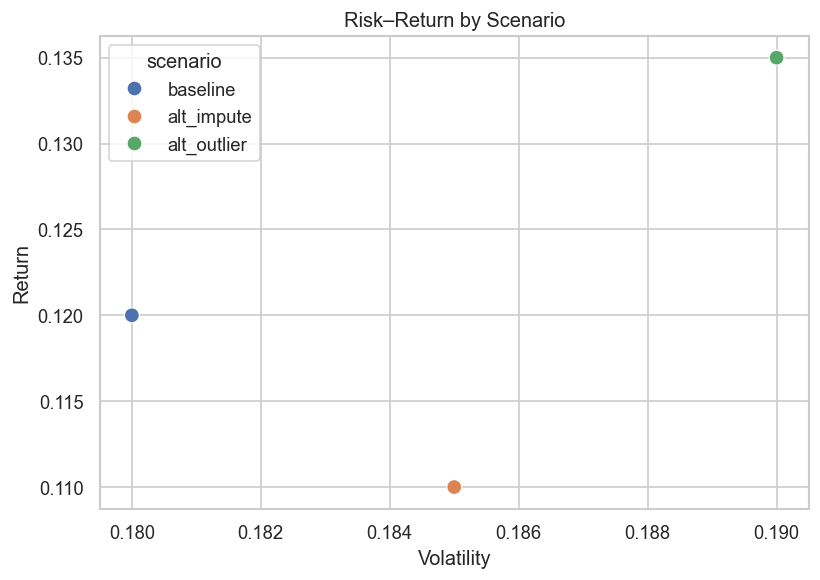

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='volatility', y='return', hue='scenario', s=80)
plt.title('Risk–Return by Scenario')
plt.xlabel('Volatility')
plt.ylabel('Return')
savefig(r"C:\Users\DELL\bootcamp_Dhriti_Trivedi\homework\stage12_results\deliverables\images\risk_return.png")
plt.show()

Saved C:\Users\DELL\bootcamp_Dhriti_Trivedi\homework\stage12_results\deliverables\images\return_by_scenario.png


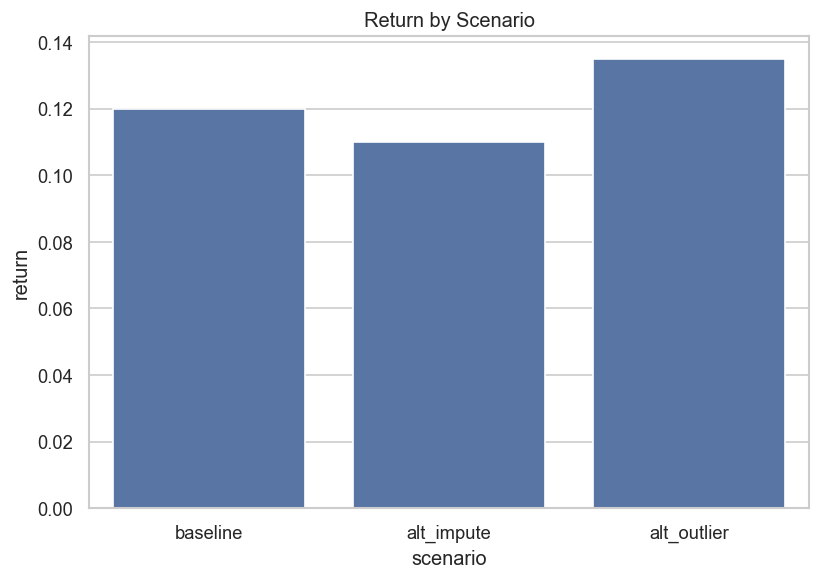

In [19]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='scenario', y='return')
plt.title('Return by Scenario')
savefig(r"C:\Users\DELL\bootcamp_Dhriti_Trivedi\homework\stage12_results\deliverables\images\return_by_scenario.png")
plt.show()

Saved C:\Users\DELL\bootcamp_Dhriti_Trivedi\homework\stage12_results\deliverables\images\metricA_over_time.png


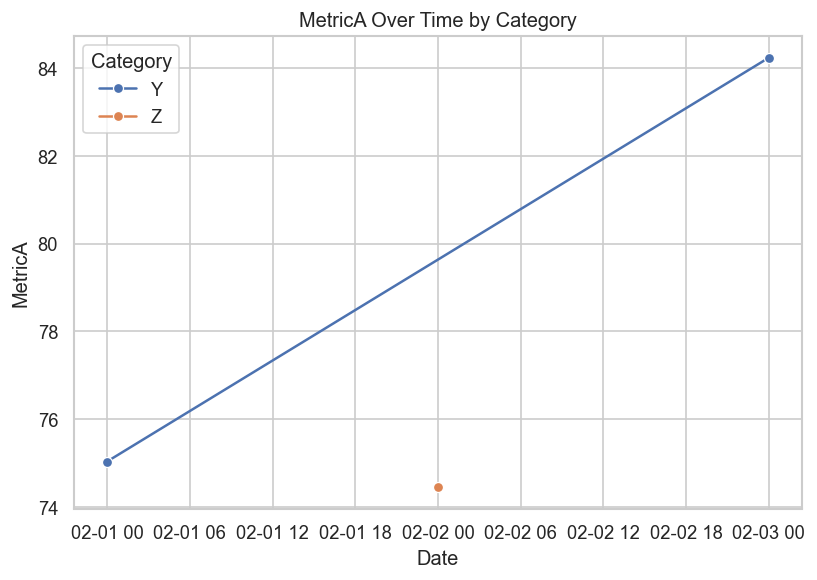

In [21]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df, x='Date', y='MetricA', hue='Category', marker='o')
plt.title('MetricA Over Time by Category')
plt.xlabel('Date')
plt.ylabel('MetricA')
savefig(r"C:\Users\DELL\bootcamp_Dhriti_Trivedi\homework\stage12_results\deliverables\images\metricA_over_time.png")
plt.show()

In [23]:
assumptions = pd.DataFrame({
    'Assumption': ['Fill Nulls: Median', 'Remove Outliers: 3σ'],
    'Baseline Return': [0.12, 0.12],
    'Alt Scenario Return': [0.10, 0.14]
})
assumptions

,Assumption,Baseline Return,Alt Scenario Return
0,Fill Nulls: Median,0.12,0.10
1,Remove Outliers: 3σ,0.12,0.14
